# **Workshop 3 (STUDENT)**

In this workshop, you'll be exploring clustering methods.

# 0) Load the Data

In [71]:
import numpy as np

# Set the seed so our output is reproducable
np.random.seed(23)
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

data_folder = './data'

Dataset 1 is of dimension (200, 2)
Dataset 2 is of dimension (200, 2)
Dataset 3 is of dimension (200, 2)


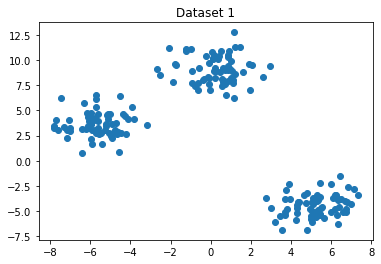

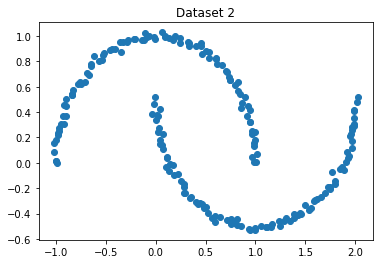

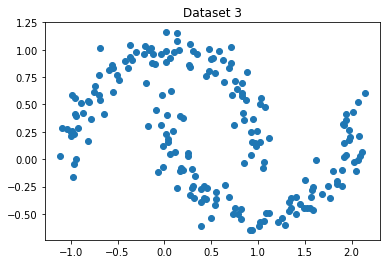

In [72]:
# First, let us load datasets to use for KMeans and Hierarchical Clustering
d1 = np.load(f'{data_folder}/hw4-p1-d1.npz')
dataset_1 = d1['data']
#print(dataset_1[:5])
print(f'Dataset 1 is of dimension {dataset_1.shape}')
initial_centers = d1['initial']

d2 = np.load(f'{data_folder}/hw4-p1-d2.npz')
dataset_2 = d2['data']
#print(dataset_2[:5])
print(f'Dataset 2 is of dimension {dataset_2.shape}')
initial_centers = d2['initial']

d3 = np.load(f'{data_folder}/hw4-p2-d2.npz')
dataset_3 = d3['data']
#print(dataset_3[:5])
print(f'Dataset 3 is of dimension {dataset_2.shape}')

# plot the data 
plt.scatter(x = dataset_1[:, 0], y=dataset_1[:, 1])
plt.title('Dataset 1')
plt.show()

plt.scatter(x = dataset_2[:, 0], y=dataset_2[:, 1])
plt.title('Dataset 2')
plt.show()

plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1])
plt.title('Dataset 3')
plt.show()

# 1) Sum of Squared Error (SSE)
In this problem, you'll be implementing a way to calculate the SEE of a set of clusters.

### Example 1.1: Cluster SSE (Follow Along)
First, to decompose the problem, we'll write a function to calculate the SEE of a single cluster.

In [73]:
def calculate_cluster_sse(cluster_data):
    """
    Write code to calculate the SSE for the dataset 'data' given cluster assignments. 
    
    INPUT:
          data: the dataset of size (n_samples, n_attributes) where n_samples is the number of samples
                and n_attributes is the number of attributes for each data point.
          
    OUTPUT:
          A floating point value containing the SSE of that cluster
    """
    
    # SOLUTION
    
    cluster_centers = np.mean(cluster_data, axis=0)
    within_sse = np.sum(np.square(cluster_data - cluster_centers))

    return within_sse

In [74]:
# Test your code!
# assume we're creating a dataset with two clusters of 2D data objects
cluster1 = np.array([[0, 0], [1, 1]])
cluster2 = np.array([[2, 2], [3, 3] ,[4, 4]])

# Let's calculate its SSE
# Should be 1
print(f'Cluster1 SSE = {calculate_cluster_sse(cluster1)}')
# Should be 4
print(f'Cluster2 SSE = {calculate_cluster_sse(cluster2)}')
# So the total SSE should be 5

Cluster1 SSE = 1.0
Cluster2 SSE = 4.0


### Problem 1.2 Clustering SSE (Group Work)
Now, using the `calculate_cluster_sse` you wrote in order to calculate the SEE for a clustering assignment.

In [75]:
# Test your code!
# assume we're creating a dataset with two clusters 
practice_data = np.concatenate((cluster1, cluster2))
#print(practice_data)
# here, 0 means that all points belong to cluster 0
# 1 means all points belong to cluster 1
practice_cluster_assignments = np.array([0, 0, 1, 1, 1]) 

# Let's calculate its SSE
print(f'For given data, SSE = {calculate_sse(practice_data, practice_cluster_assignments)}')
# should be 5 (1 for cluster1 + 4 for cluster2)

plt.scatter(x = practice_data[:, 0], y=practice_data[:, 1], c=practice_cluster_assignments)
plt.title('Dataset 2')
plt.show()

NameError: name 'calculate_sse' is not defined

In [100]:
def calculate_sse(data, cluster_assignments):
    """
    Write code to calculate the SSE for the dataset 'data' given cluster assignments. 
    
    INPUT:
          data: the dataset of size (n_samples, n_attributes) where n_samples is the number of samples
                and n_attributes is the number of attributes for each data point.
          cluster_assignments: a numpy integer vector containing the cluster assignments for each point in data.
                           It is of shape (n_attributes, ).
          
    OUTPUT:
          A floating point value containing the SSE     
    """
    ### BEGIN SOLUTION
    clusters = np.unique(cluster_assignments)
    final_SSE = 0
    
    for c in clusters:
        cluster_data = data[cluster_assignments == c, :]
        final_SSE += calculate_cluster_sse(cluster_data)
    
    return final_SSE
    
    ### END SOLUTION
     

In [ ]:
# More tests
# Let us reload the dataset for simplicity
test_d1 = np.load(f'{data_folder}/hw4-p1-practice.npz')
print(test_d1)
test_dataset_1 = d1['data']
test_initial_centers = d1['initial']

test_ds1_sse_result = calculate_sse(test_dataset_1, test_initial_centers)
print(test_ds1_sse_result)
np.testing.assert_almost_equal(test_ds1_sse_result, 10594.837409523792)

# 2) K-Means Clustering

In this problem, you will be using the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) sklearn **library** on dataset_1.

## Example 2.1: K-means Clustering (Follow)

In [ ]:
# Plot the data
plt.scatter(x = dataset_1[:, 0], y=dataset_1[:, 1])
plt.title('Dataset 1')
plt.show()

Perform a KMeans clustering on the above data. Set `n_clusters=3`. In addition, make note of what the other paramaters to the function do, even though you do not have to use them in your result.



In [ ]:
# SOLUTION
kmeans = KMeans(n_clusters=3)

Then, use KMeans to fit the data. To get the labels that KMeans give the data, use `results.label_` (the underscore is important). 

In [ ]:
#SOLUTIONS
results = kmeans.fit(dataset_1)
results.labels_

Now, plot the data again, but this time color the clusters. `plt.scatter` can take in an additional paramater `c`, which will color the data points according to a series of numeric labels.

In [ ]:
# SOLUTIONS
plt.scatter(x = dataset_1[:, 0], y=dataset_1[:, 1], c=results.labels_)

In [ ]:
# Calculate the SSE to make sure we did it right
sse = calculate_sse(dataset_1, results.labels_)
np.testing.assert_almost_equal(sse, 529.2865169916909)

## Problem 2.2: Choosing K

### Elbow Method (Group Work)



Use this to create function that takes in a dataset and a maximum k value, and returns a list of the respective inertia scores for each K. 

Then calculate the inertia scores from those inertia scores, and use the elbow method to verify what the best value for `k` is.

In [ ]:
def get_elbow_data(data, k_max):
    """
    Write code to generate a list of SSEs for each corresponding K-means clustering of size k.
    
    INPUT:
        data: the dataset of size (n_samples, n_attributes) where n_samples is the number of samples
                and n_attributes is the number of attributes for each data point.
        k_max: an integer representing the maximum number of clusterings to perform in K-means clustering.
        
    OUTPUT:
        A list of SSE scores of length k: where SSE[k] is the SSE score of a K-means clustering with k clusters.
    
    """
    # SOLUTION
    
    '''
    k = 2
    elbow_data = np.array([])
    
    while k < k_max:
        results = KMeans(n_clusters=k).fit(data)
        sse = calculate_sse(data, results.labels_)
        elbow_data = np.append(elbow_data, sse)
        k+=1
    
   
    return elbow_data
    '''
    return [calculate_sse(data,KMeans(k).fit(data).labels_) for k in range(2, k_max)]
    
    # END SOLUTION


In [ ]:
# Checking out output values
sse_values = get_elbow_data(dataset_1, 11)
sse_values

In [ ]:
# Tests to make sure the SSE values are right
np.testing.assert_almost_equal(sse_values[0], 2679.249633218189)
np.testing.assert_almost_equal(sse_values[1], 529.2865169916909)

In [ ]:
# You can use this code to plot an elbow plot
plt.plot(range(2, 11), sse_values, 'bx-')
plt.title("SSE Score vs. K")
plt.xlabel("K")
plt.ylabel("SSE")

Does the elbow plot match up to your intution?

### Example 2.3 Silhouette Score (Follow)

Now let's do a different method for trying to select K, the silhouette score.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Same procedure, but with the silhouette score
cluster1 = np.array([[0, 0], [1, 1]])
cluster2 = np.array([[2, 2], [3, 3] ,[4, 4]])

practice_data = np.concatenate((cluster1, cluster2))
practice_cluster_assignments = np.array([0, 0, 1, 1, 1]) 

score = silhouette_score(practice_data, practice_cluster_assignments)

In [ ]:
score

In [ ]:
#Lets test if it's right
np.testing.assert_almost_equal(score, 0.46761904761904755)

In [ ]:
def get_silhouettes(data, k_max):  
    silhouettes = []
    """
    Write code to generate a list of SSEs for each corresponding K-means clustering of size k.
    
    INPUT:
        data: the dataset of size (n_samples, n_attributes) where n_samples is the number of samples
                and n_attributes is the number of attributes for each data point.
        k_max: an integer representing the maximum number of clusterings to perform in K-means clustering.
        
    OUTPUT:
        A list of silhouette scores of length k: where SSE[k] is the SSE score of a K-means clustering with k clusters.
    
    """
    # Note that we start at 2, since you can't calculate
    # the silhouette score of a single cluster
    #BEGIN SOLUTION
    K = range(2, k_max)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        results = kmeans.fit(data)
        # Now add the Silhouette score!
        silhouettes.append(silhouette_score(data, results.labels_))
        
    return silhouettes
    #END SOLUTION


Let's check it for our test data again

In [ ]:
silhouette_scores = get_silhouettes(wine_data, 10)
silhouette_scores

In [ ]:
# Let's plot it
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.title("Silhouette Score vs. K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

Does the suggested value for K via the silhouette score match up?

### Problem 2.4: Choosing k on Real Data (Group Work)

This dataset is the result of a chemical analysis of different wines in the same region of Italy, but from different cultivars. Unfortunantly, there was a mix-up during planting season and nobody remembers how many cultivars there actually were!  

**Your job is to figure out how many types of cultivars the wine was sampled from, and which wines belong to which cultivars.** (Don't spoil the answer if you already know!)

First, let's load up the data.

In [ ]:
# Load the data
# Read the wine dataset and translate to pandas dataframe
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

wine_sk = datasets.load_wine()

# Make sure data is in the same range
wine_sk.data = MinMaxScaler().fit_transform(wine_sk.data)
import pandas as pd

# Note that the "target" attribute is species, represented as an integer
wine_data = pd.DataFrame(data= np.c_[wine_sk['data']],columns= wine_sk['feature_names'])

In [ ]:
wine_data

First, let's generate a scatter matrix to see if there are any obvious groupings. (Generating it might take a while)

You can **double click** the output picture to enlarge it.

In [ ]:
import seaborn as sns
sns.color_palette("bright")
sns.pairplot(wine_data)

### Backup scatter matrix code if seaborn isn't installed. Not as pretty as seaborn's though
#scatter_matrix = pd.plotting.scatter_matrix(wine_data.drop(columns=["target"]), figsize=(15,15))

Hmmm, doesn't look like there's any obvious groupings. What if we do some dimensionality reduction - maybe something will jump out?

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Keep track of our data
X = wine_sk.data

#Choose number of components
pca = PCA(n_components=2)

#Calculate PCA
pca.fit(X)

#Get PCA version of fitted data
transformed_X = pca.transform(X)

# Plot the results
plt.scatter(transformed_X[:, 0], transformed_X[:, 1])
plt.title("PCA of Wine Data")

Alright, looks like the PCA doesn't really tell us anything either. Time to do some clustering.

**Use the elbow method and silhoutte score to find a good value of K for K-means.**

In [ ]:
# SOLUTION
sse_values = get_elbow_data(X, 11)

plt.plot(range(2, 11), sse_values, 'bx-')
plt.title("SSE vs. K (Wine Dataset)")
plt.xlabel("K")
plt.ylabel("SSE")

In [ ]:
# SOLUTION
silhouette_scores = get_silhouettes(X, 10)

plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.title("Silhouette Score vs. K (Wine Dataset)")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

**Do the Elbow Method and Silhouette Score agree?**

Now, run the KMeans with your best choice of K.

In [ ]:
# SOLUTION
k = 3
kmeans = KMeans(n_clusters=k)
results = kmeans.fit(wine_sk.data)
results.labels_

Alright, let's now plot the PCA, but with our colorings generated by K-means.

In [ ]:
plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c = results.labels_)
plt.title("PCA of K-Means Clustering")

Now, let's see how many *actual* cultivars there were, and their ground truth class labels!

In [ ]:
# Plot the results
Y = wine_sk.target
print("There were "+str(len(np.unique(wine_sk.target)))+" cultivars")

plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c = Y)
plt.title("PCA of Ground Truth Groupings")

#### Does your K-means clustering agree? How do they differ? Is it okay that the cluster colors don't match up? Discuss in your group.

**Note your discussion here.**

### Vizualizing the data using t-SNE (Bonus)

Another dimensionalty reduction technique that's used in practice is [**t-SNE**](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (t-distributed Stochastic Neighbor Embedding). 

How t-SNE works is outside the scope of this course, but in practice it tends to do a better job of vizualizing high-dimensional datasets into very low (i.e. 2 or 3) dimensions than PCA. 

Here's the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) for t-SNE. 

The output of t-SNE is **non-deterministic**, so you will get different embeddings accross multiple runs.

Text(0.5, 1.0, 't-SNE of Wine Data')

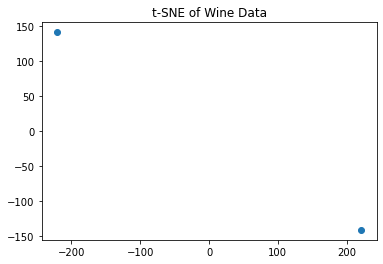

In [95]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, init='random', learning_rate=200).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title("t-SNE of Wine Data")

#### Does the t-SNE data tell you anything that the PCA didn't? Discuss.

**Note your discussion here.**

# 3) Agglomerative Hierarchical Clustering

Now, we're going to try Agglomerative Clustering, using the [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) library from sklearn.

First, take a look at the data we're trying to cluster.

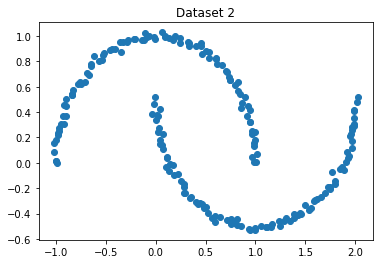

In [96]:
plt.scatter(x = dataset_2[:, 0], y=dataset_2[:, 1])
plt.title('Dataset 2')
plt.show()

### Example 3.1: Trying K-means (Follow)
Try a K-means on this dataset with `n_clusters=2` and the rest of the same paramaters used previously

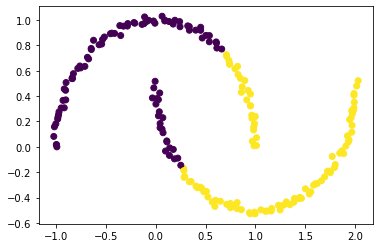

In [97]:
# Follow along by typing this code
kmeans = KMeans(n_clusters=2)
results = kmeans.fit(dataset_2)
plt.scatter(x = dataset_2[:, 0], y=dataset_2[:, 1], c=results.labels_)

### Problem 3.2: Agglomerative Clustering (Group)
Use the agglomerative clustering on this dataset with `n_clusters=2`. Try it with both `complete` and `single` linkage.

After each clustering, caculate the SSE for both single and complete and compare them.

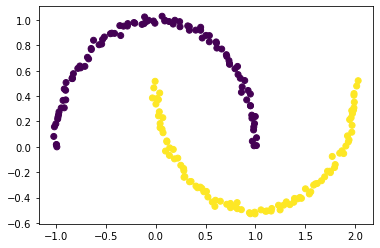

In [98]:
# First do single link
# SOLUTION
agg = AgglomerativeClustering(n_clusters=2, linkage='single')

results = agg.fit(dataset_2)
plt.scatter(x = dataset_2[:, 0], y=dataset_2[:, 1], c=results.labels_)

In [101]:
#Now check the SSE of your result here
calculate_sse(dataset_2, results.labels_)

121.76952070250866

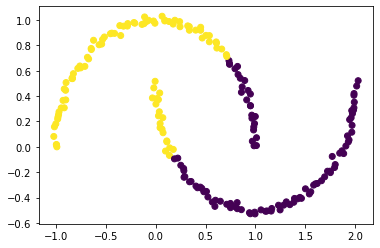

In [102]:
# Now try complete link
# SOLUTION

agg = agg = AgglomerativeClustering(n_clusters=2, linkage='complete')

results = agg.fit(dataset_2)
plt.scatter(x = dataset_2[:, 0], y=dataset_2[:, 1], c=results.labels_)

In [103]:
#Now check the SEE of your result here
calculate_sse(dataset_2, results.labels_)

81.53911094739291

#### Which clustering method is more appropriate, #single or complete link? Which has the lower SSE value? What does this tell us?

**Note your discussion here**
Which clustering method is more appropriate:SINGLE, which has the lower SSE Value: Complete.  Higher value for Single linkage cluster, as it is treats each dataset as its own set, not a complete.

### Example 3.3: Dendrogram (Follow)

SKlearn doesn't have a built in method for dendograms, so we'll be using [scipy's dendrogram tool](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

Let's try the dendrogram on the dataset we had above.

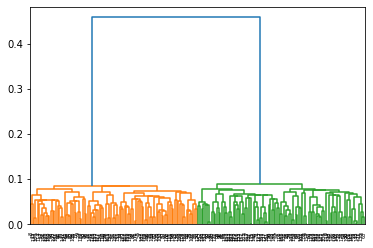

In [104]:
import scipy.cluster.hierarchy as hierarchy

# Note the method='single'
Z = hierarchy.linkage(dataset_2, method='single')
hierarchy.dendrogram(Z)
plt.show()

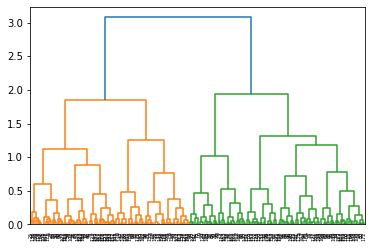

In [105]:

# Note the method='complete'
Z = hierarchy.linkage(dataset_2, method='complete')
hierarchy.dendrogram(Z)
plt.show()

### Interpreting the dendrograms
With the single link there is a large vertical distance between the two main clusters and all the subclusters is a good sign and signifies that the clusters are distinct. Compare that to the complete linkage clustering, where it seems that every linkage is at an equal distance, which doesn't signify that the clusters are that distinct.

### Problem 3.4: Dendograms and Wine Clustering (Group)

Now, let's go back to our wine dataset, view some dendrograms, and try agglomerative clustering on it.

In [ ]:
# Use single link here
Z = hierarchy.linkage(transformed_X, method='single')

hierarchy.dendrogram(Z)
plt.show()

In [ ]:
# Use complete link here
Z = hierarchy.linkage(transformed_X, method='complete')

hierarchy.dendrogram(Z)
plt.show()

By looking at the dendrograms, and using what you know now about how many clusters there should be, predict which algorithm you think performed better. Explain why you predicted that way.

**Discuss here.**




Now, check the results by performing PCA and coloring by the labels like you did with K-means.

In [ ]:
# Use single link here
agg = AgglomerativeClustering(n_clusters=3, linkage='single')

results = agg.fit(transformed_X)

plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c=agg.labels_)
plt.title("PCA of Wine Data (Single Link)")

In [ ]:
# Use complete link here
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')

results = agg.fit(transformed_X)

plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c=agg.labels_)
plt.title("PCA of Wine Data (Complete Link)")

Which method worked better?  COMPLETE

# 4) DBSCAN
Now we'll look at a datset where neither K-means nor Agglomerative Clustering does well.

### Example 4.1: Limitations of k-means and hierarchical clustering (Group)

In [ ]:
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1])
plt.title('Dataset 3')
plt.show()

#### Trying K-means
Try a K-means on this dataset with `n_clusters=2` and the rest of the same paramaters used previously

In [ ]:
# Try K-means
kmeans = KMeans(n_clusters=2)

results = kmeans.fit(dataset_3)
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1], c=results.labels_)

#### Trying Agglomerative
Try a agglomerative clustering on this dataset with `n_clusters=2`. Try it with both `complete` and `single` linkage.

In [ ]:
# Try agglomerative clustering
agglom = AgglomerativeClustering(n_clusters=2, linkage='complete')

results = agglom.fit(dataset_3)
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1], c=results.labels_)

In [ ]:
# Try agglomerative clustering
agglom = AgglomerativeClustering(n_clusters=2, linkage='single')

results = agglom.fit(dataset_3)
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1], c=results.labels_)

### Problem 4.2: DBSCAN
[Here is the sklearn documentation for DBSCAN.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) 

As discussed in class, finding the right number for `eps` and `min_samples` (min points) can be a bit touchy. **A good rule of thumb is to choose `min_samples` to be twice the dimension of the feature space.**

We'll be using the method discussed in class to determine a good way to determine and `eps` for a given `min_samples`. That is, if `min_samples=k`, plot the distance from each point to it's kth nearest neighbor. Then, sort those distances and plot them. Finally, locate on the graph where the sharpest change begins, and use that distance as your `eps`. You might have to play with values near that to get a good clustering.

### Problem 4.2.1: Selecting Values for DBSCAN (Follow)


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Since we're in 2D, we have min points be 2*2=4
min_pts = 4
#Get the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_pts).fit(dataset_3)
distances, indices = neighbors.kneighbors(dataset_3)
#Sort them
dis_to_nth_nn = sorted(distances[:,min_pts-1])
#Plot
plt.plot(dis_to_nth_nn)
plt.title(f'(Identifying best Eps value for MinPts={min_pts}')
plt.xlabel("nth Greatest Datapoint")
plt.ylabel(f'Distance to {min_pts}th Nearest Neighbor')

As we can see, the sharpest cange begins at around the 175th greatest datapoint, which corresponds to a value of around `0.15`. So that can serve as a starting point for trying out different `eps` values.

In [ ]:
# BEGIN SOLUTION
#Try with different eps from 0.15-0.22. 0.21 seems to be the best
dbscan = DBSCAN(eps=0.21, min_samples=min_pts)
results = dbscan.fit(dataset_3)
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1], c=results.labels_)

In [ ]:
results.labels_

### Problem 4.2.2: DBSCAN on the Wine Dataset (Group)
Now let's try the same procedure on a more complex dataset. Choose a `minpoints`, then use that to find a good `eps`. Perform DBSCAN, and then plot your clusters with PCA like you did before. (It might not end up looking good, or working that well at even that...)

In [ ]:
from sklearn.neighbors import NearestNeighbors

#BEGIN SOLUTION
min_pts = 13*2
neighbors = NearestNeighbors(n_neighbors=min_pts).fit(wine_sk.data)

#distances, indices = None
#dis_to_nth_nn = None
distances, indices = neighbors.kneighbors(wine_sk.data)
#Sort them
dis_to_nth_nn = sorted(distances[:,min_pts-1])

plt.plot(dis_to_nth_nn)
plt.title(f'(Identifying best Eps value for MinPts={min_pts})')
plt.xlabel("nth Greatest Datapoint")
plt.ylabel(f'Distance to {min_pts}th Nearest Neighbor')

In [ ]:
# BEGIN SOLUTION
dbscan = DBSCAN(eps=0.83, min_samples=min_pts)
results = dbscan.fit(wine_sk.data)
#dbscan = None
#results = None
print(results.labels_)
plt.scatter(x = transformed_X[:, 0], y=transformed_X[:, 1], c=results.labels_)

What are your results? Why do you think DBSCAN failed in this case?  DBSCAN doesnt do well with scattered less dense data, it does well with high density grouping.  An arc is harder to detect using DBSCAN.

***Note your discussion here***
Solution: DBSCAN doesn't work well in high dimensional spaces, usually only works for 2 or 3 dimensions.

# ----- Homework from PDF -----

In [ ]:
## PROGRAMMED THE QUESTION AND RESULTS
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[9, 5], [1, 4], [7, 4], [1, 9], [2, 1], [4, 6], [8, 8], [9, 1], [6, 6], [3, 3]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_
kmeans.predict([[7, 4], [9, 1], [6,6]])
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='grey', marker='d', label="centroids")
plt.scatter(x=X[:, 0], y=X[:, 1], c=kmeans.labels_)

# DBSCAN PLOT PROGRAMMED THE QUESTION AND RESULTS


In [ ]:
## PROGRAMMED THE QUESTION AND RESULTS
from sklearn.cluster import DBSCAN
import numpy as np
D = np.array([[0, 1], [0, 2], [1, 1], [1, 2], [5, 2], [5, 1], [6, 1], [6, 2], [3, 2]])
clustering = DBSCAN(eps=2, min_samples=4).fit(D)
clustering.labels_
x = np.arange(0,10,0.2)

In [ ]:
plt.scatter(D[:,0], D[:,1], color='grey', marker='d', label="nothing")


In [ ]:
clustering

# Answer:
I is border point, the remaining points form two clusters:  abcd, and efgh

In [146]:
# Question 2 

from scipy.spatial import distance_matrix
import numpy as np
X = np.array([[9, 5], [1, 4], [7, 4], [1, 9], [2, 1], [4, 6], [8, 8], [9, 1], [6, 6], [3, 3]])

array_distance_M = distance_matrix(X, X, p=2)
array_distance = distance_matrix(X, X, p=2)
np.set_printoptions(precision=2)
print( 'a       ','b    ','c    ','d    ','e    ','f    ','g    ','h    ','i    ','j')
print(array_distance)

a        b     c     d     e     f     g     h     i     j
[[ 0.    8.06  2.24  8.94  8.06  5.1   3.16  4.    3.16  6.32]
 [ 8.06  0.    6.    5.    3.16  3.61  8.06  8.54  5.39  2.24]
 [ 2.24  6.    0.    7.81  5.83  3.61  4.12  3.61  2.24  4.12]
 [ 8.94  5.    7.81  0.    8.06  4.24  7.07 11.31  5.83  6.32]
 [ 8.06  3.16  5.83  8.06  0.    5.39  9.22  7.    6.4   2.24]
 [ 5.1   3.61  3.61  4.24  5.39  0.    4.47  7.07  2.    3.16]
 [ 3.16  8.06  4.12  7.07  9.22  4.47  0.    7.07  2.83  7.07]
 [ 4.    8.54  3.61 11.31  7.    7.07  7.07  0.    5.83  6.32]
 [ 3.16  5.39  2.24  5.83  6.4   2.    2.83  5.83  0.    4.24]
 [ 6.32  2.24  4.12  6.32  2.24  3.16  7.07  6.32  4.24  0.  ]]


## Step a: The shortest distance in the matrix is 2 and the vectors associated with that are F & I
So the first cluster is F — I

removing F and I

In [150]:
print(" F-I :", np.minimum(array_distance_M[5],array_distance_M[8]),"\n")


X = np.array([[9, 5], [1, 4], [7, 4], [1, 9], [2, 1], [8, 8], [9, 1], [3, 3]])
array_distance = distance_matrix(X, X, p=2)
np.set_printoptions(precision=2)
print( 'a       ','b    ','c    ','d    ','e    ','g    ','h    ','j')
print(array_distance)

 F-I : [3.16 3.61 2.24 4.24 5.39 0.   2.83 5.83 0.   3.16] 

a        b     c     d     e     g     h     j
[[ 0.    8.06  2.24  8.94  8.06  3.16  4.    6.32]
 [ 8.06  0.    6.    5.    3.16  8.06  8.54  2.24]
 [ 2.24  6.    0.    7.81  5.83  4.12  3.61  4.12]
 [ 8.94  5.    7.81  0.    8.06  7.07 11.31  6.32]
 [ 8.06  3.16  5.83  8.06  0.    9.22  7.    2.24]
 [ 3.16  8.06  4.12  7.07  9.22  0.    7.07  7.07]
 [ 4.    8.54  3.61 11.31  7.    7.07  0.    6.32]
 [ 6.32  2.24  4.12  6.32  2.24  7.07  6.32  0.  ]]


## Step b: The shortest distance in the matrix is 2.24 and the vectors associated with that are A & C, B & J, E & J
So the Second cluster is A — C  

removing A and C

In [170]:
print("A-C: ",np.maximum(array_distance_M[0],array_distance_M[2]),"\n")
print("B-J: ",np.maximum(array_distance_M[1],array_distance_M[8]),"\n")
print("E-J: ",np.maximum(array_distance_M[4],array_distance_M[8]),"\n")
print(" F-I :", np.minimum(array_distance_M[5],array_distance_M[8]),"\n")

X = np.array([[1, 4], [1, 9], [2, 1], [8, 8], [9, 1], [3, 3]])
array_distance = distance_matrix(X, X, p=2)
np.set_printoptions(precision=2)
print( '   b    ','d    ','e    ','g    ','h    ','j')
print(array_distance)

A-C:  [2.24 8.06 2.24 8.94 8.06 5.1  4.12 4.   3.16 6.32] 

B-J:  [8.06 5.39 6.   5.83 6.4  3.61 8.06 8.54 5.39 4.24] 

E-J:  [8.06 5.39 5.83 8.06 6.4  5.39 9.22 7.   6.4  4.24] 

 F-I : [3.16 3.61 2.24 4.24 5.39 0.   2.83 5.83 0.   3.16] 

   b     d     e     g     h     j
[[ 0.    5.    3.16  8.06  8.54  2.24]
 [ 5.    0.    8.06  7.07 11.31  6.32]
 [ 3.16  8.06  0.    9.22  7.    2.24]
 [ 8.06  7.07  9.22  0.    7.07  7.07]
 [ 8.54 11.31  7.    7.07  0.    6.32]
 [ 2.24  6.32  2.24  7.07  6.32  0.  ]]


## Step c: The shortest distance in the matrix is 2.24 and the vectors associated with that are B & J, E & J
So the Third cluster is B — J, E -J

removing B, E & J

In [165]:
X = np.array([[1, 9], [8, 8], [9, 1]])
array_distance = distance_matrix(X, X, p=2)
np.set_printoptions(precision=2)
print( '   d    ','g    ','h    ')
print(array_distance)

   d     g     h    
[[ 0.    7.07 11.31]
 [ 7.07  0.    7.07]
 [11.31  7.07  0.  ]]


## Step d: The shortest distance in the matrix is 7 and the vectors associated with that are E & H
So the Fourth cluster is D - G

removing D

In [145]:
X = np.array([[1, 9], [8, 8]])
array_distance = distance_matrix(X, X, p=2)
np.set_printoptions(precision=2)
print( '   d    ','g    ')
print(array_distance)

   d     g    
[[0.   7.07]
 [7.07 0.  ]]


## Step e: The shortest distance in the matrix is 7.07 and the vectors associated with that are D & G
So the fifth cluster is D - G


In [ ]:
## Confirm it with a Hierarchical Graph

In [107]:
import numpy as np
X = np.array([[9, 5], [1, 4], [7, 4], [1, 9], [2, 1], [4, 6], [8, 8], [9, 1], [6, 6], [3, 3]])

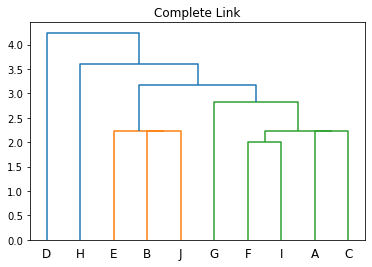

In [164]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
mat = array_distance_M
dists = squareform(mat)
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=["A","B","C","D","E","F","G","H","I","J"])
plt.title("Complete Link")
plt.show()

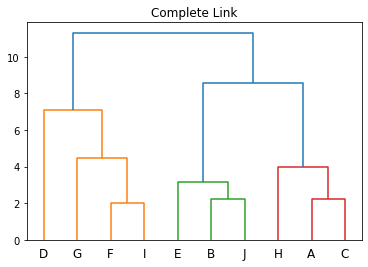

In [168]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
mat = array_distance_M
dists = squareform(mat)
linkage_matrix = linkage(dists, "complete")
dendrogram(linkage_matrix, labels=["A","B","C","D","E","F","G","H","I","J"])
plt.title("Complete Link")
plt.show()